<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/e/ed/Pandas_logo.svg/1200px-Pandas_logo.svg.png" width="25%" height="25%" />

# Pandas - Unit 13 - Long x Wide format

## <img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%202%20-%20Unit%20Objective.png"> Unit Objectives

* Differentiate a dataset in a long or wide format

---

## <img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%204%20-%20Import%20Package%20for%20Learning.png"> Import Package for Learning

import numpy as np
import pandas as pd

---

## <img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%2010-%20Lesson%20Content.png"> Long x Wide format

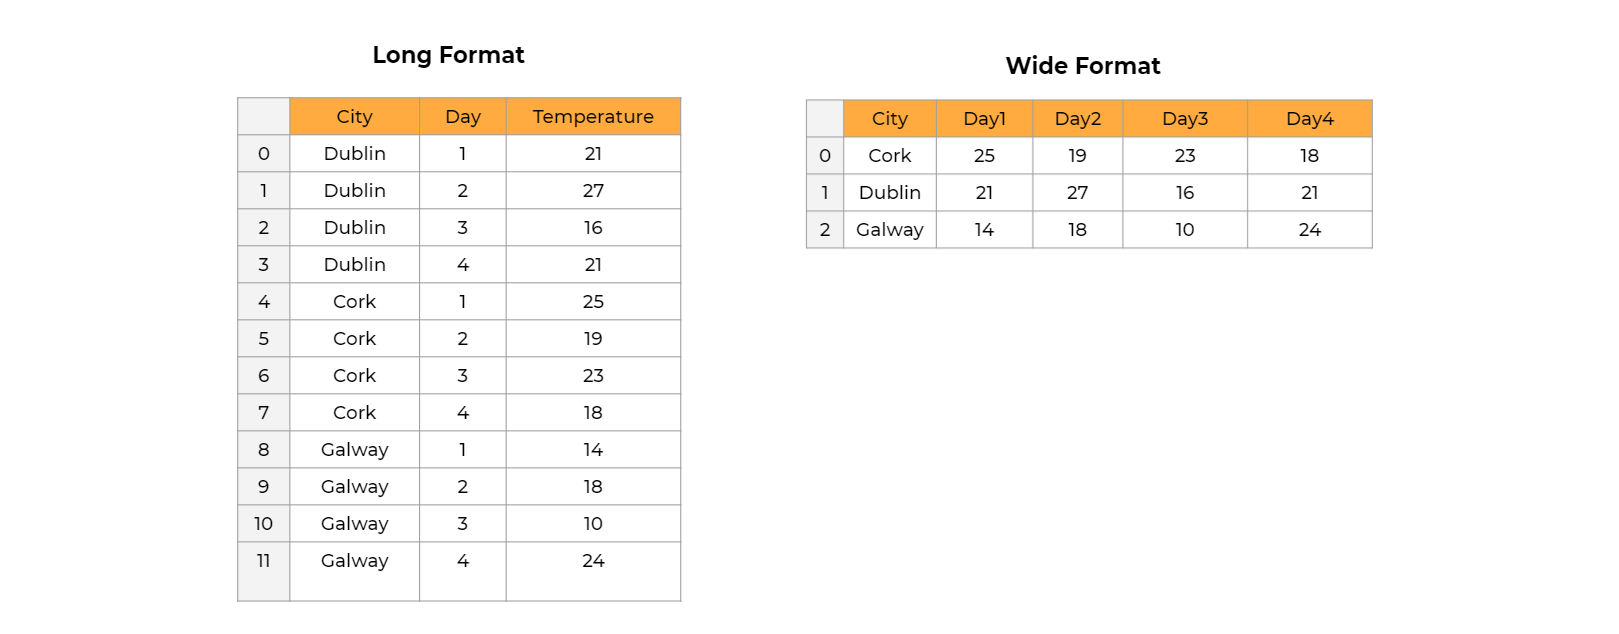

<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%207-%20Note.png"> Your data can be in the **long** or in the **wide** format

* In a **long** format, every row represents an observation belonging to a particular category.
* In **wide** format, categorical data is grouped. You can frame as a summary of long data. It is typically easier to read and interpret compared to the long format. 
    

<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%207-%20Note.png"> The **need** for considering long or wide formats is because a given function (imported from the libraries used in data science) may be constructed considering one format or another. It will be your job to pre-process the data to properly combine your data and the functions imported from the libraries




Let's see the examples below so we can understand the use cases

* Consider the following dataset: invented **records for Average Temperature for 4 days in 3 different cities**.
  * You can create using the techniques you learned so far. The example below is in the **long format**, where the dataset has a column for possible variable types (City, Day, Temperature).
  * Each cell value, is a representation from the column it is related to.
    * For example, when you see 1 under 'Day' column, you know you refer to day. 
    * When you see 21 under 'Temperature' column, you know it is a temperature
  * The more data you add (imagine if you keep adding days for a giving city), the more the DataFrame will grow vertically, in a "long" way

 


import numpy as np
np.random.seed(seed=101)

df_long = pd.DataFrame(data= {'City':['Dublin','Dublin','Dublin','Dublin',
                                      'Cork','Cork','Cork','Cork','Galway',
                                      'Galway','Galway','Galway'],
                              'Day':[1,2,3,4]*3,
                              'AvgTemperature': np.random.randint(10,30,12)})

df_long

<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%207-%20Note.png"> The same dataset, could be represented in a different format
  * The example below is in the **wide format**. 
  * Each cell value is the response for the set of variables. In this case, it is a temperature value, for a given day, for a given city
    * When you see 25 under 'Day1' column, you know it is a temperature.

  * The more data you add (imagine if you keep adding days for a given city), the more the DataFrame will grow horizontally, in a "wide" way.

df_wide = pd.DataFrame(data= {'City': ['Cork','Dublin','Galway'],
                              'Day1':[25,21,14],
                              'Day2':[19,27,18],
                              'Day3':[23,16,10],
                              'Day4':[18,21,24]}
                  )
df_wide

Naturally you will not hard code the transformation from one format to another. 
  * To transform Long to Wide, use **pd.pivot_table()**  . The documentation is found [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.pivot_table.html). 
  * To transform Wide to Long, use **pd.melt()**. The documentation is [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.melt.html)


### <img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%2010-%20Lesson%20Content.png"> Pivot Table

Let's learn the use cases
  * Consider your long DataFrame

df_long

You can transform to a wide format using `pd.pivot_table(`)
  * index are the variables you want to remain untouched. In this case, it is one variable: '`City`'
  * columns are the variables you want to spread. In this case, it is '`Day`'
  * values are the numerical values you want to aggregate/process

pd.pivot_table(data=df_long,
               index=['City'],
               columns=['Day'],
               values='AvgTemperature')

You will notice the output is a DataFrame and with multi-index: `Day` and `City.` You can transform it to a more conventional format by applying the methods `reset_index()` and `rename_axis(),` using additional processing to format the DataFrame nicely.
  * `.rename_axis()` is used set the name of the axis for the index. `mapper` sets the name, in this case `None`. `axis=1` indicates you want to rename the index. The documentation is [here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rename_axis.html)

pd.pivot_table(data=df_long,
               index='City',
               columns='Day',
               values='AvgTemperature').reset_index().rename_axis(mapper=None, axis=1)

<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%205%20-%20Practice.png"> **PRACTICE** : We will consider the following fictitious data showing the daily sales of various models of cars over four weekly periods.



import numpy as np
np.random.seed(seed=144)
df_long_practice = pd.DataFrame(data= {'Model':['Hyundai','Hyundai','Hyundai','Hyundai',
                                      'Ford','Ford','Ford','Ford','Mazda',
                                      'Mazda','Mazda','Mazda','Fiat', 'Fiat','Fiat','Fiat'],
                              'Week':['Week 1', 'Week 2', 'Week 3', 'Week 4']*4,
                              'DailySales': np.random.randint(1,10,16)})
df_long_practice

Using the pivot_table function
* set index to `Model` set columns to `Week` and set values to `AvgSales`
* Then reset the index 
* Then use rename_axis setting mapper to None and axis to 1 

# Write your code here.
pd.pivot_table(data=df_long_practice,
               index=['Model'],
               columns=['Week'],
               values='DailySales',
              ).reset_index().rename_axis(mapper=None, axis=1)


### <img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%2010-%20Lesson%20Content.png"> Melt

You can transform from wide to long. Let's recap df_wide

df_wide

Use` pd.melt()`
  * `frame` is the DataFrame
  * `var_name` is the categorical column name you will create
  * `value_name` is the numerical column name you will create
  * `value_vars` are the columns you will "shrink" or "melt"
  * `id_vars` are columns to use as identifier variables, or variables that will remain untouched.

pd.melt(frame=df_wide,
        var_name='Day',
        value_name='AverageTemperature',
        value_vars=['Day1','Day2','Day3','Day4'],
        id_vars=['City'])

<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%205%20-%20Practice.png"> **PRACTICE** : We will consider the following fictitious data showing the daily sales of various models of cars over four weekly periods and is displayed in the wide format.




df_wide_practice = pd.DataFrame(data= {'Model': ['Hyundai','Ford','Mazda', 'Fiat'],
                              'Week 1':[8,9,7,7],
                              'Week 2':[4,3,1,6],
                              'Week 3':[2,6,2,2],
                              'Week 4':[9,7,3,3]}
                  )
df_wide_practice


Using the melt set the frame to `df_wide_practice`
* Use var_name to create a column named `Week`
* Use value_name to create a column named `DailySales`
* Use value_vars to melt the columns Week 1 through to week 4
* Use id_vars on the `Model` column as this should remain untouched.

# Write your code here.
pd.melt(frame=df_wide_practice,
       var_name='Week',
       value_name='DailySales',
       value_vars=['Week 1','Week 2','Week 3','Week 4'],
       id_vars=['Model'])

---

### <img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%2010-%20Lesson%20Content.png"> Pivot Table to generate statistics

Another use case for **pd.pivot_table()** is to generae a table of statistics that helps summarize the data of a larger table


Consider the following dataset. 
  * It shows records for diamonds price and its characteristics, like color, cut, clarity and depth

import seaborn as sns
df = sns.load_dataset('diamonds')
df = df.head(200)
print(df.shape)
df.head(10)

You are interested to summarize and check the mean price per cut and per color.
* Note we have multiple rows of the same cut and color The example below queries data from cut == 'Ideal' and color == 'E'.

  * Therefore we need to use a aggregation function when using pivot table. In this case, we will use 'mean'

df.query("cut == 'Ideal' and color == 'E'")

These are the arguments for `pd.pivot_table()`
  * `values` 'price' and `aggfunc` is 'mean'
  * `index` is 'cut and `columns` is 'color'



At the end, you can check the price level, for each cut and color

pd.pivot_table(data=df,
               index='cut',
               columns='color',
               values='price',
               aggfunc='mean')

Imagine now that you are interested to summarize and check the max price per cut and color per clarity.
  * your index will be a list: ['cut','color']. 
  * your columns will be: 'clarity'
  * you will notice few cells have NaN, indicating that particular combinaion doesn't exist
   * You can use the parameter ``fill_value`` and set it to a suitable value to replace missing values with, a good value in this case would be 0
  * you will also notice that this transformation, as it is, is not super insightful, since we create a chunk of numbers. However, this processing step prepares the data to be parsed to a function where you potentially could visualize the data and extract useful insights. We will do that in future lessons

pd.pivot_table(data=df,
               index=['cut','color'],
               columns='clarity',
               values='price',
               fill_value=0,
               aggfunc='max')

<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%205%20-%20Practice.png"> **PRACTICE** : We will consider tips dataset for practice. It holds records for waiter tips, based on day of the week, day time, total bill, gender, if it is a smoker table or not, and how many people were in the table.



df_practice = sns.load_dataset('tips')
print(f"DataFrame shape: {df_practice.shape}")
df_practice.head(50)

You have to choose your days and times to work; you want to check which days you should work on and which shift to maximise your potential tips.

To retrieve this data, you need to use a pivot_table and set data to df_practice
* You will need to set the index as ``day`` and ``time``.
* To see which tables give the most tips, you will need to set columns to ``size``
* And as you are interested in tips, you will need to set values to ``tip``
* For the aggfunc you will use ``sum``
* And so as not to have NaN showing set ``fill_value`` to 0

When you run this, you should have a good idea of what days and shifts to work.






# Write your code here.
pd.pivot_table(data=df_practice,
               index=['day','time'],
               columns='size',
               values='tip',
               fill_value=0,
               aggfunc='sum')


---

<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%206%20-%20Warning.png"> **WARNING** <img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%206%20-%20Warning.png">

You might have noticed up to this point there is a lot covered in Pandas, multiple functions/methods with multiple use cases.
  * It is virtually **IMPOSSIBLE** to remember all functions and all arguments. The library documentation is fundamental to develop a project.
  * Naturally, over time you will get familiar and used to the most common use cases, but in general, a data professional spends **a lot of time** searching on Internet the documentation and uses cases.

---